# Analytics

Lo studente deve:

- importare i dati

- selezionare 30 variabili (utilizzare SelectKBest con chi2)

- non è necessario il bilanciamento

- suddividere il campione in file TRAIN=70%  e  file TEST=30% 

- applicare un neural network con 5 nodi nel primo strato e 5 nel secondo

- valutare il modello 

Ripetere la stessa analisi con le foreste random (RandomForestClassifier), senza fare la selezione delle variabili, usando 200 alberi.

Provare a fare il tuning dei modelli

Riportare brevemente i risultati ottenuti in un doc

upload dei risultati e del programma

In [137]:
#importiamo le variabili che ci interessano
import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from keras import Sequential
from keras.utils import np_utils
from keras.layers import Activation,BatchNormalization,Dropout,Dense

Prima di tutto importo il dataset in questione e guardo le prime righe $(dataset.head())$

In [138]:
dataset=pd.read_csv('/Users/alfonsodamelio/Downloads/ottotrain3.csv',delimiter=',')

In [139]:
dataset=dataset.drop(['id'],axis=1)
dataset.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,3,0,0,0,0,0,3


+ Vediamo se ci sono dei valori **Na** nel dataset in questione
    - nel caso ci fossero, vediamo le colonne che li hanno

In [140]:
print(dataset.isnull().values.any())
print(dataset.columns[dataset.isnull().any()].tolist())

False
[]


Non c'è bisogno quindi di imputare

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy ="mean", axis = 0)

#only on the coluomns where there are missing values
imputer = imputer.fit(X[:, [1,3]])
X[:, [1,3]] = imputer.transform(X[:, [1,3]])

Divido in $X$ ed $y$, dove $y$ è la variabile risposta..

In [104]:
X=dataset.drop(['target'],axis=1).values
y=dataset['target'].values

In [105]:
print(X.shape)
print(y.shape)

(21783, 93)
(21783,)


In [70]:
X_30= SelectKBest(chi2, k=30).fit_transform(X, y)

In [71]:
print(X_30.shape)

(21783, 30)


Non c'è bisogno di creare ne variabili dummies ne di mettere log

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X_30, y, test_size = 0.3, random_state = 0)

In [73]:
print(X_train.shape)
print(X_test.shape)

(15248, 30)
(6535, 30)


Nel caso volessi fare il balancing del TRAIN:

**SMOTE Oversampling**

*from imblearn.over_sampling import SMOTE*

*from sklearn.externals.joblib.parallel import _backend*

*sm = SMOTE(random_state=0, ratio = 1.0)*

*X, y = sm.fit_sample(X, y)*

In [74]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

Converto lista di label [1,2,0] in:
+ [[0,1,0],[0,0,1],[1,0,0]]

In [75]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(y_train)

**oppure cosi se voglio usare one hot encoder:**

*onehot_encoder = OneHotEncoder(sparse=False)*

*integer_encoded = y_train.reshape(len(y_train), 1)*

*onehot_encoded = onehot_encoder.fit_transform(integer_encoded)*

**Costruiamo la rete neurale con due hidden layer da 5 strati**

In [76]:
model=Sequential()
model.add(Dense(5,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history=model.fit(X_train, y_train,epochs=50,batch_size=64,validation_split=0.2)





Train on 12198 samples, validate on 3050 samples
Epoch 1/50
12198/12198 [==============================] - 1s 50us/step - loss: 0.8936 - acc: 0.6198 - val_loss: 0.6638 - val_acc: 0.7964
Epoch 2/50
12198/12198 [==============================] - 0s 18us/step - loss: 0.5154 - acc: 0.8333 - val_loss: 0.4414 - val_acc: 0.8443
Epoch 3/50
12198/12198 [==============================] - 0s 18us/step - loss: 0.3435 - acc: 0.8953 - val_loss: 0.3059 - val_acc: 0.9115
Epoch 4/50
12198/12198 [==============================] - 0s 18us/step - loss: 0.2584 - acc: 0.9256 - val_loss: 0.2549 - val_acc: 0.9193
Epoch 5/50
12198/12198 [==============================] - 0s 18us/step - loss: 0.2228 - acc: 0.9351 - val_loss: 0.2272 - val_acc: 0.9361
Epoch 6/50
12198/12198 [==============================] - 0s 17us/step - loss: 0.2061 - acc: 0.9411 - val_loss: 0.2186 - val_acc: 0.9393
Epoch 7/50
12198/12198 [==============================] - 0s 17us/step - loss: 0.1975 - acc: 0.9441 - val_loss: 0.2089 - val_acc:

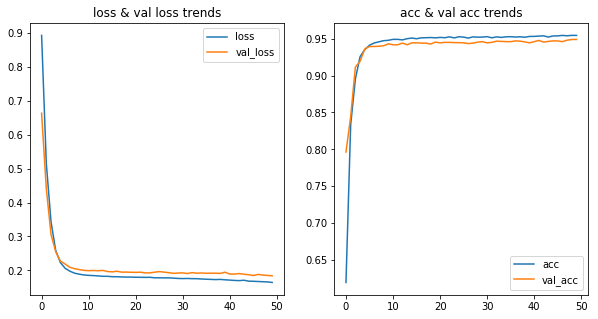

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('loss & val loss trends')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.subplot(1,2,2)
plt.title('acc & val acc trends')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])




In [94]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [100]:
accuracy=accuracy_score(y_pred,y_test)
print("accuracy score: %s"%accuracy)
print()
conf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrix: ')
print(conf_mat)

accuracy score: 0.947054322877

confusion matrix: 
[[ 444   31    2]
 [  50 3988  248]
 [   2   13 1757]]


### Adesso facciamo la stessa cosa ma senza usare select k best e utilizzando Random forest

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state = 0)

In [142]:
print(X_train.shape)
print(X_test.shape)

(15248, 93)
(6535, 93)


In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc=RandomForestClassifier(n_estimators=200)
classifier=rfc.fit(X_train,y_train)

In [145]:
y_pred_rf=classifier.predict(X_test)

In [146]:
accuracy=accuracy_score(y_pred_rf,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred_rf,y_test)
print(cm)

Accuracy: 0.96480489671

Confusion matrix:
[[ 483    0    0]
 [  13 4028  213]
 [   0    4 1794]]


**Proviamo a fare il grid search**

In [148]:
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier()
#specify the parameters for wich we want to find the optimal values, give different options in dictionaries
parameters = [{'n_estimators': [200,400,1000], "max_depth":[1,3,5],'min_samples_leaf':[1,2], 'min_samples_split':[2,4]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print('best_accuracy: %s'%best_accuracy)
print()
best_parameters = grid_search.best_params_
print('best_parameters: ')
print(best_parameters)

best_accuracy: 0.964192025184

best_parameters: 
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [149]:
rfc=RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=2,max_depth=5)
classifier=rfc.fit(X_train,y_train)

y_pred_rf=classifier.predict(X_test)

accuracy=accuracy_score(y_pred_rf,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred_rf,y_test)
print(cm)

Accuracy: 0.960214231064

Confusion matrix:
[[ 455    0    0]
 [  41 4032  219]
 [   0    0 1788]]
